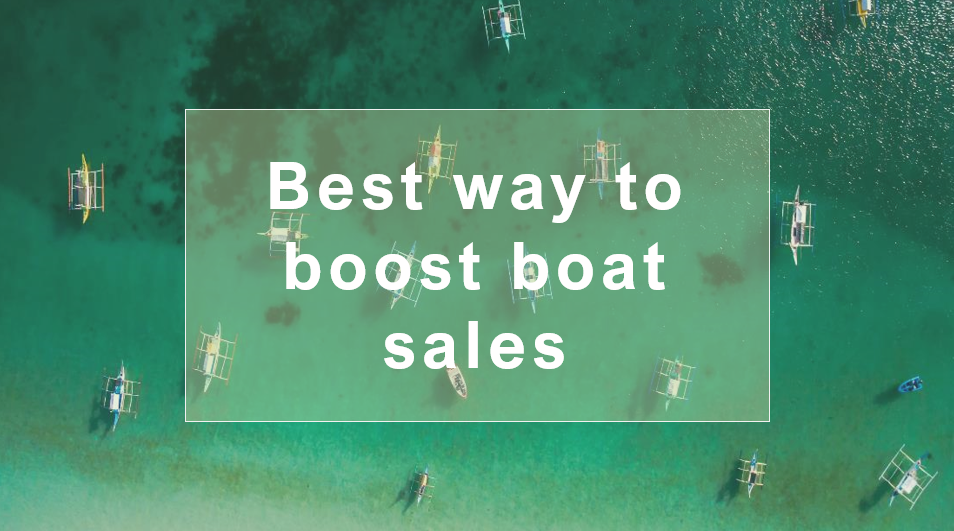

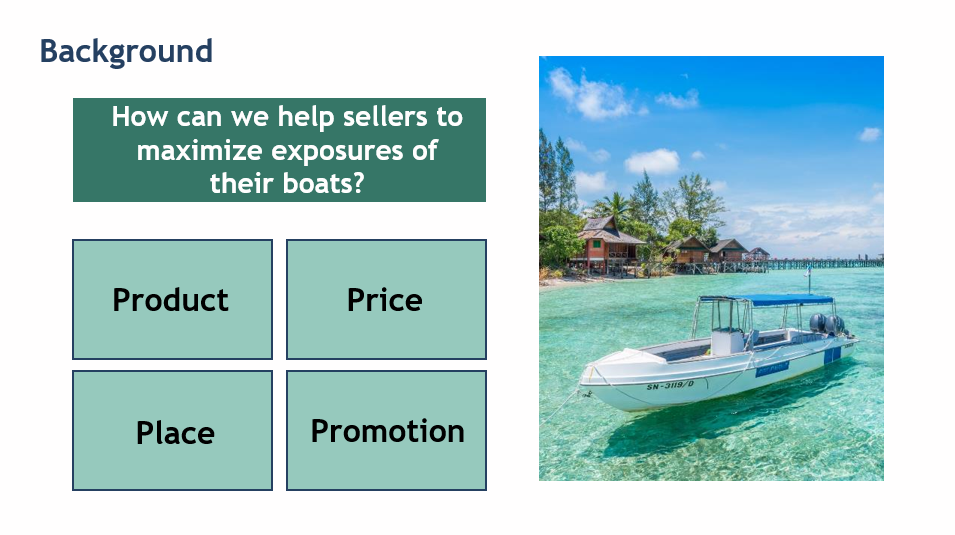

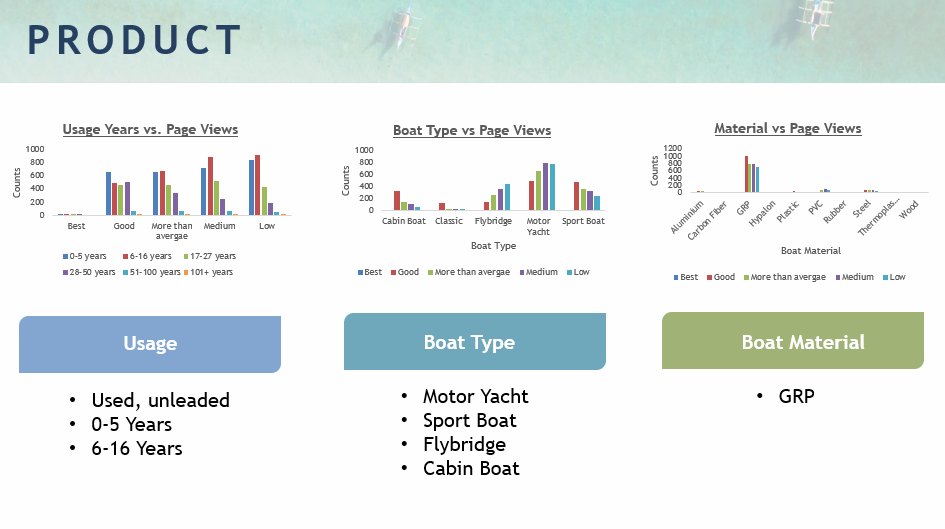

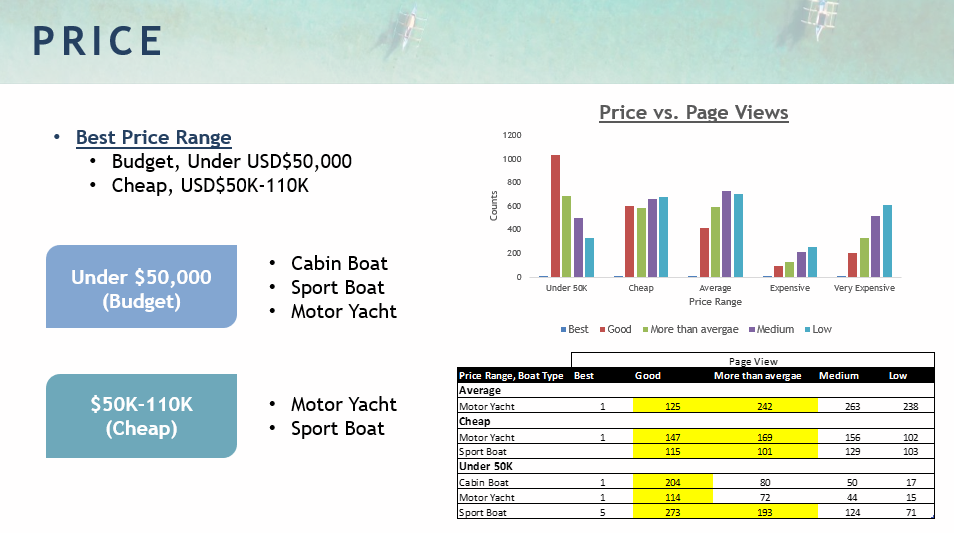

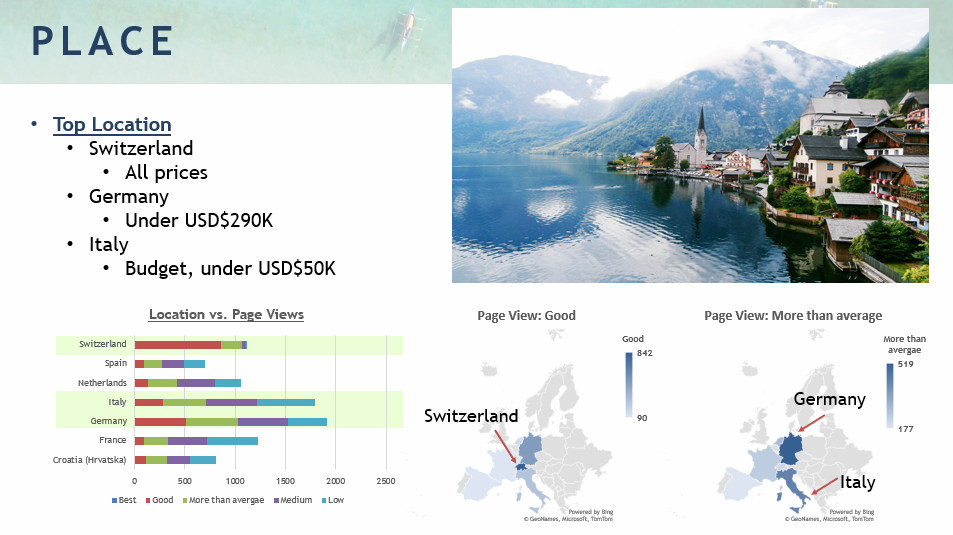

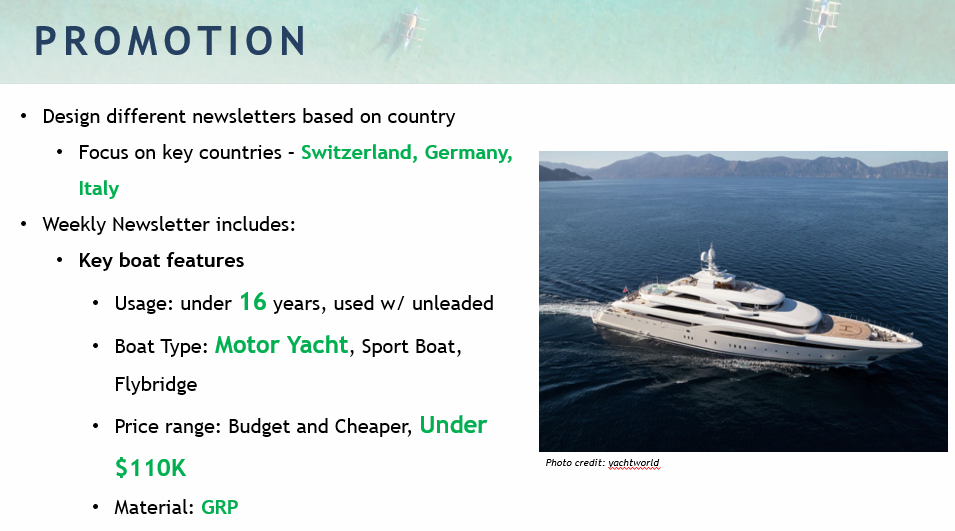

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pylab

In [4]:
boat = pd.read_csv('boatdata.csv', index_col=0)

In [5]:
# add a new column category next to the age. 
age_category = pd.cut(boat.Age,bins=[0,6,17,28,51,101,137],labels=['0-5 years', '6-16 years','17-27 years', '28-50 years', '51-100 years', '101+ years'])
boat.insert(12,'Age Group',age_category)

In [6]:
# add a new column category next to the L7D page view. 
pv_category = pd.cut(boat['Number of views last 7 days'],bins=[0,71,111,176,1301,3263],labels=['Low', 'Medium','More than avergae', 'Good', 'Best'])
boat.insert(22,'PV Group',pv_category)

In [7]:
# add a new column category next to the USD price. 
price_category = pd.cut(boat['USD'],bins=[0,50001,110001,290001,400001,35030000],labels=['Under 50K','Cheap','Average','Expensive', 'Very Expensive'])
boat.insert(2,'USD Price Group',price_category)

### Feature's Correlation

In [42]:

boat.corr()

,Amount,USD,Year Built,Age,Length,Width,Number of views last 7 days
Amount,1.000000,0.958363,0.012162,-0.106813,0.544831,0.505382,-0.013856
USD,0.958363,1.000000,0.008918,-0.104009,0.562385,0.518692,-0.008958
Year Built,0.012162,0.008918,1.000000,-1.000000,0.117290,0.127150,0.024808
Age,-0.106813,-0.104009,-1.000000,1.000000,0.202201,0.104668,0.113593
Length,0.544831,0.562385,0.117290,0.202201,1.000000,0.873093,-0.135011
Width,0.505382,0.518692,0.127150,0.104668,0.873093,1.000000,-0.157547
Number of views last 7 days,-0.013856,-0.008958,0.024808,0.113593,-0.135011,-0.157547,1.000000


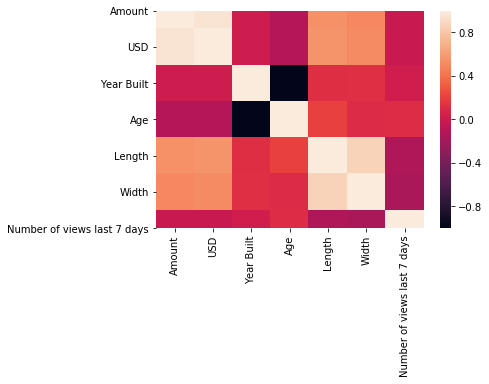

In [39]:
sns.heatmap(boat.corr());

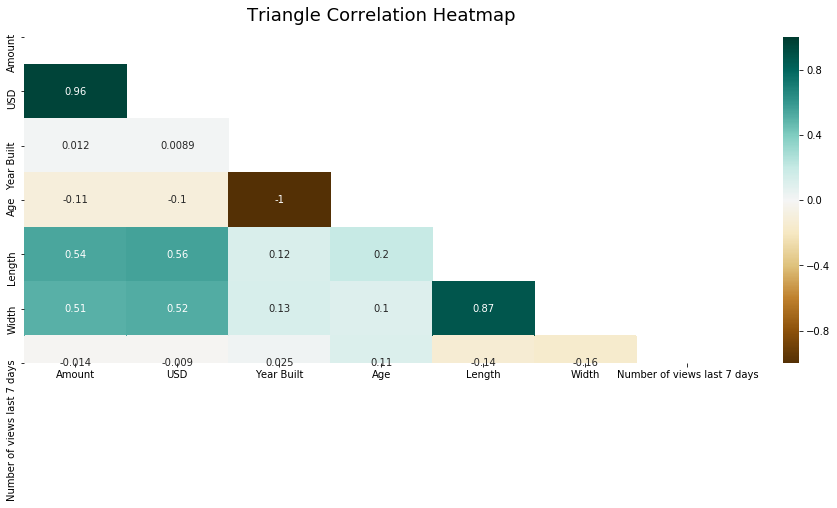

In [67]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(boat.corr(), dtype=np.bool))
heatmap = sns.heatmap(boat.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

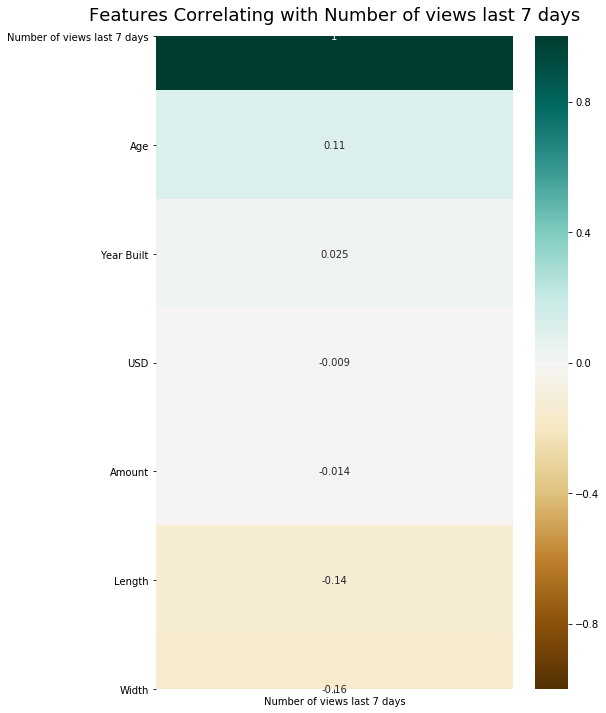

In [41]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(boat.corr()[['Number of views last 7 days']].sort_values(by='Number of views last 7 days', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Number of views last 7 days', fontdict={'fontsize':18}, pad=16);

In [6]:
boat.to_csv (r'export_dataframe.csv', index = False, header=True)